In [2]:
from alphaengine import stats, loaders
import matplotlib.pyplot as plt

In [3]:
luv = loaders.FileInstrument('../../../Developer/Data/prices/NYSE/LUV.csv')

In [4]:
import talib as ta

In [5]:
ta.RSI(luv['close'], timeperiod=100)

array([        nan,         nan,         nan, ..., 50.25572759,
       50.34067179, 50.26480922])

In [6]:
ta.RSI(luv['close'], timeperiod=10)

array([        nan,         nan,         nan, ..., 44.54698904,
       45.97306576, 44.85166242])

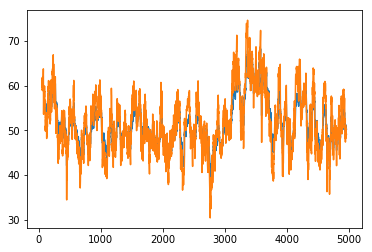

In [7]:
plt.plot(ta.RSI(luv['close'], timeperiod=100))
plt.plot(ta.RSI(luv['close'], timeperiod=50))

In [8]:
luv.attach_feature(ta.RSI(luv['close'], timeperiod=100), 'rsi_100')
luv.attach_feature(ta.RSI(luv['close'], timeperiod=50), 'rsi_50')

In [9]:
mc = stats.monte_carlo(luv, luv['rsi_100'] > luv['rsi_50'])

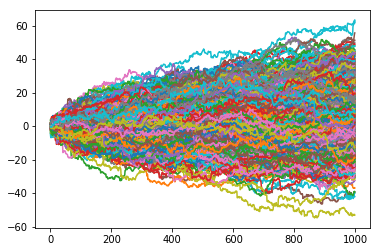

In [10]:
plt.plot(mc.T)

In [11]:
luv.column_names

['day',
 'month',
 'year',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'forward_returns',
 'rsi_100',
 'rsi_50']

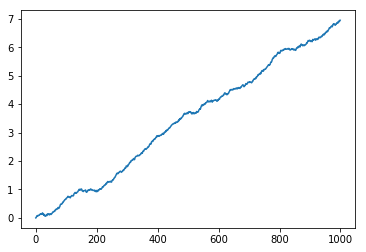

In [12]:
import numpy as np
plt.plot(np.mean(mc, axis=0))

(array([ 1.,  0.,  0.,  0.,  1.,  3.,  1.,  0.,  2.,  6.,  7.,  6., 11.,
        19., 19., 27., 24., 35., 30., 34., 39., 39., 45., 55., 51., 54.,
        53., 44., 57., 42., 41., 40., 40., 40., 27., 22., 15., 17., 15.,
        14.,  4.,  8.,  3.,  4.,  2.,  0.,  1.,  0.,  0.,  2.]),
 array([-53.1  , -50.775, -48.45 , -46.125, -43.8  , -41.475, -39.15 ,
        -36.825, -34.5  , -32.175, -29.85 , -27.525, -25.2  , -22.875,
        -20.55 , -18.225, -15.9  , -13.575, -11.25 ,  -8.925,  -6.6  ,
         -4.275,  -1.95 ,   0.375,   2.7  ,   5.025,   7.35 ,   9.675,
         12.   ,  14.325,  16.65 ,  18.975,  21.3  ,  23.625,  25.95 ,
         28.275,  30.6  ,  32.925,  35.25 ,  37.575,  39.9  ,  42.225,
         44.55 ,  46.875,  49.2  ,  51.525,  53.85 ,  56.175,  58.5  ,
         60.825,  63.15 ]),
 <a list of 50 Patch objects>)

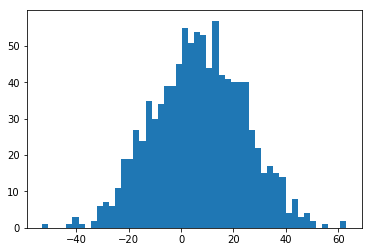

In [13]:
plt.hist(mc[:,-1], bins=50)

In [14]:
bh = stats.monte_carlo(luv, np.ones(len(luv['close'])).astype(bool))

(array([ 1.,  0.,  0.,  0.,  1.,  3.,  1.,  0.,  2.,  6.,  7.,  6., 11.,
        19., 19., 27., 24., 35., 30., 34., 39., 39., 45., 55., 51., 54.,
        53., 44., 57., 42., 41., 40., 40., 40., 27., 22., 15., 17., 15.,
        14.,  4.,  8.,  3.,  4.,  2.,  0.,  1.,  0.,  0.,  2.]),
 array([-53.1  , -50.775, -48.45 , -46.125, -43.8  , -41.475, -39.15 ,
        -36.825, -34.5  , -32.175, -29.85 , -27.525, -25.2  , -22.875,
        -20.55 , -18.225, -15.9  , -13.575, -11.25 ,  -8.925,  -6.6  ,
         -4.275,  -1.95 ,   0.375,   2.7  ,   5.025,   7.35 ,   9.675,
         12.   ,  14.325,  16.65 ,  18.975,  21.3  ,  23.625,  25.95 ,
         28.275,  30.6  ,  32.925,  35.25 ,  37.575,  39.9  ,  42.225,
         44.55 ,  46.875,  49.2  ,  51.525,  53.85 ,  56.175,  58.5  ,
         60.825,  63.15 ]),
 <a list of 50 Patch objects>)

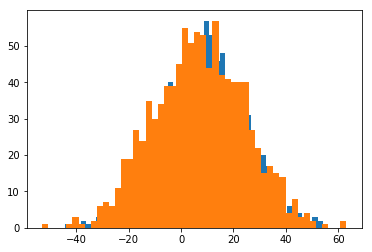

In [15]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

In [16]:
from statsmodels.stats.weightstats import ttest_ind

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')

(-1.7053230591115587, 0.9558551856333731, 1998.0)

In [18]:
def calculate_p_score(asset, strategy, bh, samples=1000, simulations=1000):
    mc = stats.monte_carlo(asset, strategy, samples=samples, simulations=simulations)
    
    _, p, _ = ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')
    return p

In [19]:
# calculate_p_score(luv, luv['rsi_100'] > luv['rsi_50'])

In [20]:
good_strats = []
bh_strat = np.ones(len(luv['close'])).astype(bool)
bh = stats.monte_carlo(luv, bh_strat, samples=1000, simulations=1000)

for i in range(100):
    print(i)
    rsi = ta.RSI(luv['close'], timeperiod=5+i)
    p = calculate_p_score(asset=luv, strategy=rsi > 60, bh=bh)
    if p < 0.001:
        good_strats.append(rsi > 60)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [23]:
eurusd = loaders.FileInstrument('../../../Developer/Data/prices/FOREX/EURUSD.csv')

In [ ]:
plt.plot(good_strats[31])

In [69]:
ema = ta.SMA(eurusd['close'], timeperiod=100)
eurusd.attach_feature(ema, 'sma')

In [70]:
np.diff(eurusd['sma'], prepend=eurusd['sma'][0]) > 0

array([False, False, False, ...,  True,  True,  True])

In [71]:
bh = stats.monte_carlo(eurusd, np.ones(len(eurusd['close'])).astype(bool))

In [98]:
mc = stats.monte_carlo(eurusd, np.diff(eurusd['sma'], prepend=eurusd['sma'][0]) < -0.002)

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  5.,  6.,  9., 11.,  9., 11., 15.,
        26., 26., 25., 33., 30., 38., 51., 45., 45., 51., 48., 46., 37.,
        52., 60., 54., 40., 41., 21., 27., 27., 20., 19., 12.,  9.,  9.,
         8.,  8.,  9.,  3.,  1.,  2.,  2.,  0.,  2.,  2.,  1.]),
 array([-0.7281  , -0.658026, -0.587952, -0.517878, -0.447804, -0.37773 ,
        -0.307656, -0.237582, -0.167508, -0.097434, -0.02736 ,  0.042714,
         0.112788,  0.182862,  0.252936,  0.32301 ,  0.393084,  0.463158,
         0.533232,  0.603306,  0.67338 ,  0.743454,  0.813528,  0.883602,
         0.953676,  1.02375 ,  1.093824,  1.163898,  1.233972,  1.304046,
         1.37412 ,  1.444194,  1.514268,  1.584342,  1.654416,  1.72449 ,
         1.794564,  1.864638,  1.934712,  2.004786,  2.07486 ,  2.144934,
         2.215008,  2.285082,  2.355156,  2.42523 ,  2.495304,  2.565378,
         2.635452,  2.705526,  2.7756  ]),
 <a list of 50 Patch objects>)

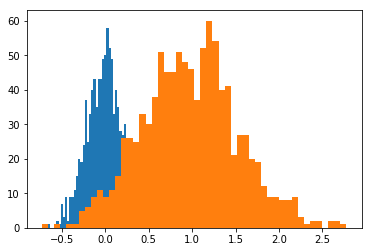

In [99]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

In [ ]:
plt.hist(eurusd['forward_'])